模仿練習：資料來源[A Journey through Titanic](https://www.kaggle.com/omarelgabry/titanic/a-journey-through-titanic)

In [1]:
##imports

#pandas
import pandas as pd
from pandas import Series,DataFrame #感覺這行有點多餘？

#numpy,matplotlib,seaborn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns              #這個還沒學過
sns.set_style('whitegrid')
#%matplotlib inline                 #這行似乎是在讓可視圖不要超過框框？

#machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC,LinearSVC
from sklearn.ensemble import RandomForestClassifier    #這個還沒學過
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB            #這個還沒學過

* 用pip新安裝[seaborn](http://seaborn.pydata.org/) 
* 有兩個新的model沒看過

In [26]:
#get titanic & test csv files as DataFrame
titanic_df = pd.read_csv('https://storage.googleapis.com/py_ds_basic/kaggle_titanic_train.csv')
test_df = pd.read_csv('https://storage.googleapis.com/py_ds_basic/kaggle_titanic_test.csv')

#preview the data
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
#輸出每個欄的統計數據，可以看到哪些是有Nan
titanic_df.info()
print('--------------------------------')
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
--------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object


### 先丟除了無用數據'PassengerId','Name','Ticket'

In [5]:
#drop unnecessary columns,these columns won't be useful analysis and prediction
titanic_df = titanic_df.drop(['PassengerId','Name','Ticket'],axis=1)
test_df = test_df.drop(['PassengerId','Name'],axis=1)

### Embarked 從豋船地點分析

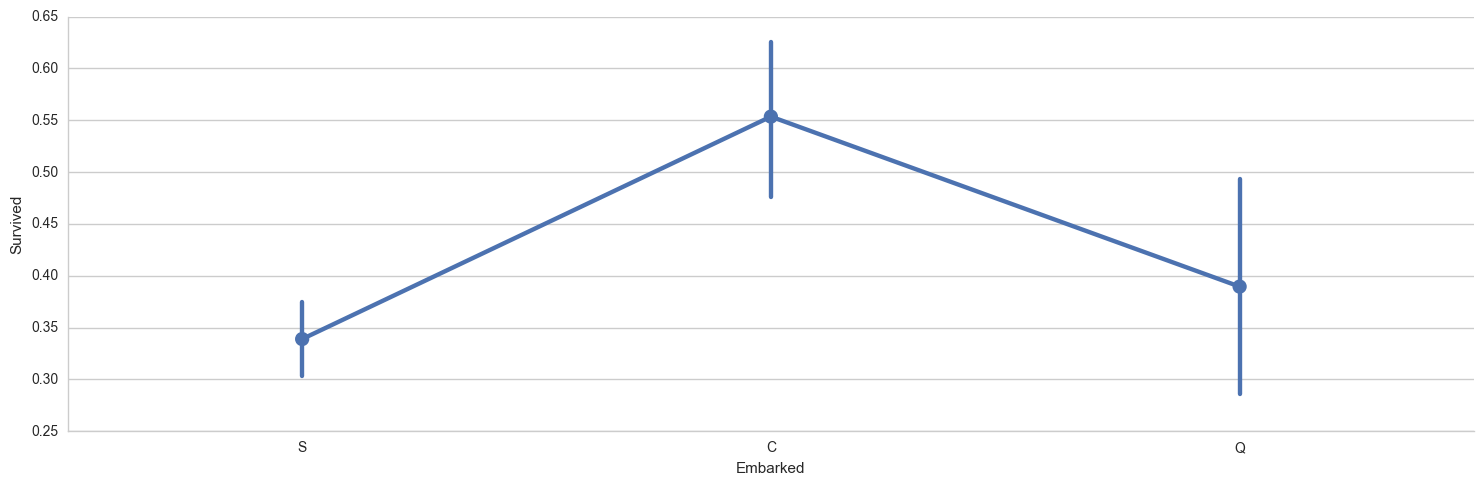

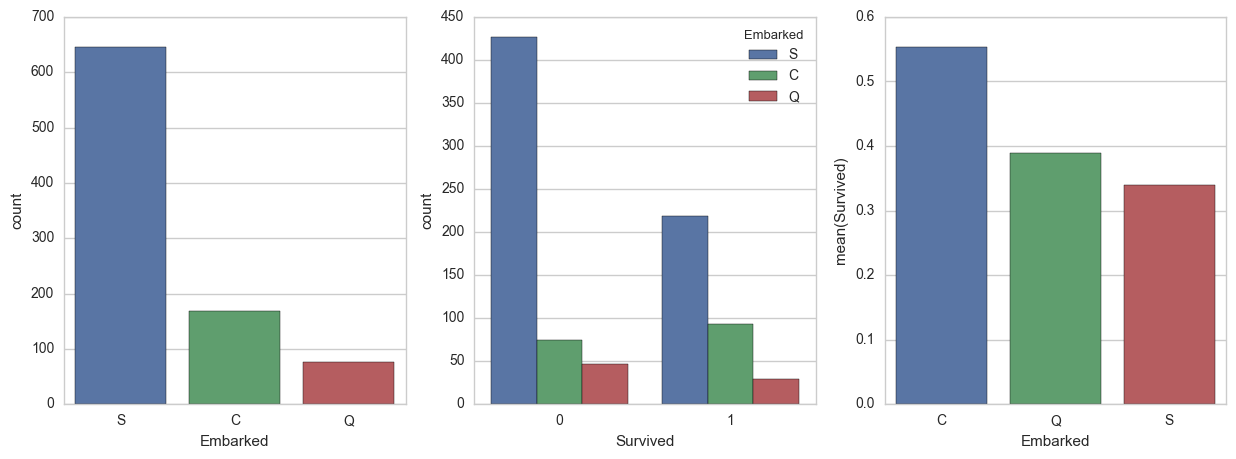

In [6]:
# only in titanic_df, fill the two missing values with the most occurred value, which is "S".
#從titanic.info可以看到有兩個丟失值，使用數值最多的s來填補。
titanic_df['Embarked'] = titanic_df['Embarked'].fillna('S')

#plot
#第一張圖，用sns.factorplot來畫出以x='Embarked'的各類別在y=''Survived'的占比（因子）
sns.factorplot('Embarked','Survived',data = titanic_df,size=5,aspect=3)

#切割畫面，多圖
fig,(axis1,axis2,axis3) = plt.subplots(1,3,figsize=(15,5))

#第一張圖，計算各個類別的總數
#另一種寫法 sns.factorplot('Embarked',data=titanic_df,kind='count',order=['S','C','Q'],ax=axis1)  
sns.countplot('Embarked',data=titanic_df,ax=axis1)

#第二張圖，計算指定類別的總數(order的部分)，指定欄位的類別小視窗(hue)
#另一種寫法  sns.factorplot('Survived',hue="Embarked",data=titanic_df,kind='count',order=[1,0],ax=axis2)
sns.countplot('Survived',hue='Embarked',data = titanic_df,order=[0,1],ax=axis2)

#第三張圖，計算Survived和Embarked中由Embarked分群後的平均值，as_index是指分群的指標是否當作行的類別，False就是行還是由0,1,2...排列
Embarked_prec = titanic_df[['Survived','Embarked']].groupby(['Embarked'],as_index=False).mean()
sns.barplot(x='Embarked',y='Survived',data = Embarked_prec,ax=axis3)

plt.show()

* 經由畫出來的圖，來評估是否這個欄位對Survived的影響很大，原作者認為C，Q類別有較高生存率
* 或者將整個Embarked欄位刪除，因為沒有高度相關聯性（我是都Encoder後保留）

In [7]:
#titanic_df中Embarked欄位Encoder

#這個轉化dummy variables的方法沒學過 
#之前是學sklearn的preprocessing的LabelEncoder
embark_dummies_titanic  = pd.get_dummies(titanic_df['Embarked'])        
#embark_dummies_titanic.drop(['S'], axis=1, inplace=True)      #我想保留    

#將轉變好的df加進原本的df
titanic_df = titanic_df.join(embark_dummies_titanic)

#將沒轉變的Embarked欄位去除
titanic_df.drop(['Embarked'], axis=1,inplace=True)

titanic_df.head() #Encoder後數據

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,C,Q,S
0,0,3,male,22.0,1,0,7.2500,NaN,0,0,1
1,1,1,female,38.0,1,0,71.2833,C85,1,0,0
2,1,3,female,26.0,0,0,7.9250,NaN,0,0,1
3,1,1,female,35.0,1,0,53.1000,C123,0,0,1
4,0,3,male,35.0,0,0,8.0500,NaN,0,0,1


In [8]:
#test_df中Embarked欄位Encoder

#test_df做法一樣
embark_dummies_test = pd.get_dummies(test_df['Embarked'])
#embark_dummies_test.drop(['S'], axis=1, inplace=True)        #一樣保留下來

test_df = test_df.join(embark_dummies_test)

test_df.drop(['Embarked'], axis=1,inplace=True)

test_df.head() #Encoder後數據

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,C,Q,S
0,3,male,34.5,0,0,330911,7.8292,NaN,0,1,0
1,3,female,47.0,1,0,363272,7.0000,NaN,0,0,1
2,2,male,62.0,0,0,240276,9.6875,NaN,0,1,0
3,3,male,27.0,0,0,315154,8.6625,NaN,0,0,1
4,3,female,22.0,1,1,3101298,12.2875,NaN,0,0,1


* Embarked的部分Encoder完成


### Fare 船票價格分析


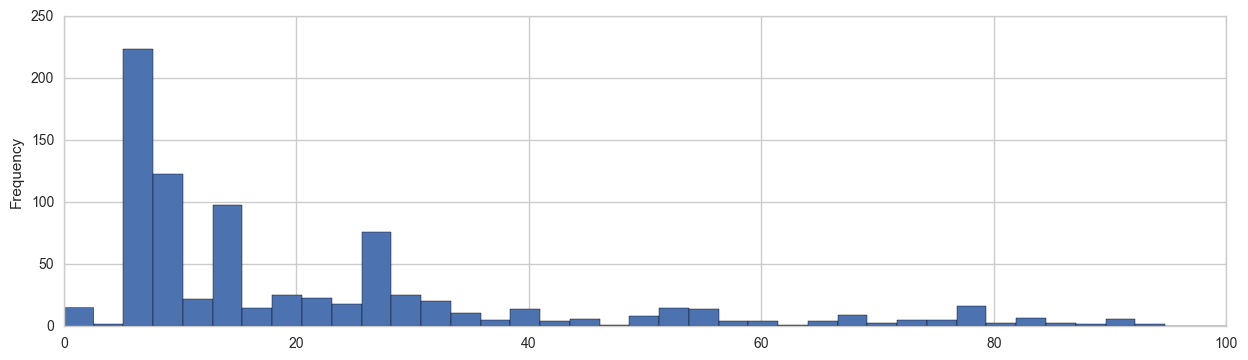

In [9]:
# only for test_df, since there is a missing "Fare" values
#只有在test_df裡中有丟失的值，用中位數填補
test_df['Fare'].fillna(test_df['Fare'].mean(),inplace=True)

# convert from float to int
#將小數轉為整數
titanic_df['Fare'] = titanic_df['Fare'].astype(int)
test_df['Fare']    = test_df['Fare'].astype(int)

# get fare for survived & didn't survive passengers 
#取出存活者的Fare跟沒存活者的Fare
fare_not_survived = titanic_df['Fare'][titanic_df['Survived']==0]
fare_survived = titanic_df['Fare'][titanic_df['Survived']==1]

# get average and std for fare of survived/not survived passengers
#創一個df裡面是存活的平均票價，沒存活的平均票價，另一個df裡面是標準差
avgerage_fare = pd.DataFrame([fare_not_survived.mean(), fare_survived.mean()])
std_fare      = pd.DataFrame([fare_not_survived.std(), fare_survived.std()])

#繪圖：各票價的人數，超過100的極少，約略集中在票價100以下 (xlim)，hist長條圖，bins長條細緻度，數字越大越粗略
titanic_df['Fare'].plot(kind='hist',figsize=(15,4),bins=200,xlim=(0,100))

plt.show()

           0
0  21.690346
1  47.991228
-------------------
                  0
Survived           
0         21.690346
1         47.991228


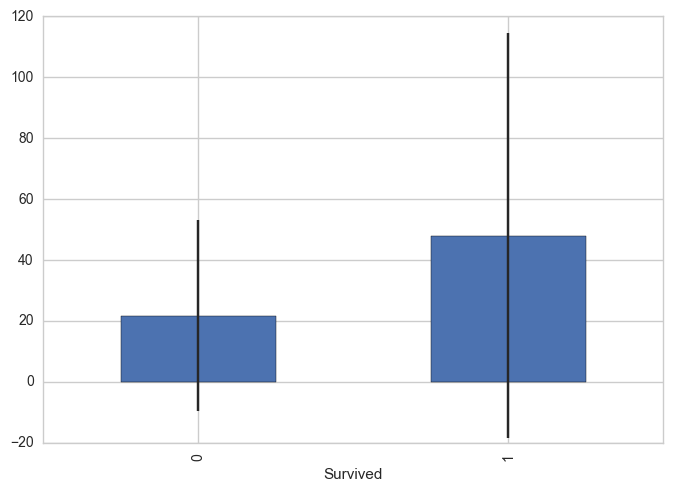

In [10]:
print(avgerage_fare)
print('-------------------')
avgerage_fare.index.names = std_fare.index.names = ["Survived"] #將avgerage_fare這個df的‘行‘命名（ 繪圖時不用再plt.xlabel）
print(avgerage_fare)

avgerage_fare.plot(kind='bar',yerr=std_fare,legend=False)   #yerr=std_fare這裡看不懂

plt.show()

* 老實講看不懂 std_fare畫出圖的意義

### Age年齡分析

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


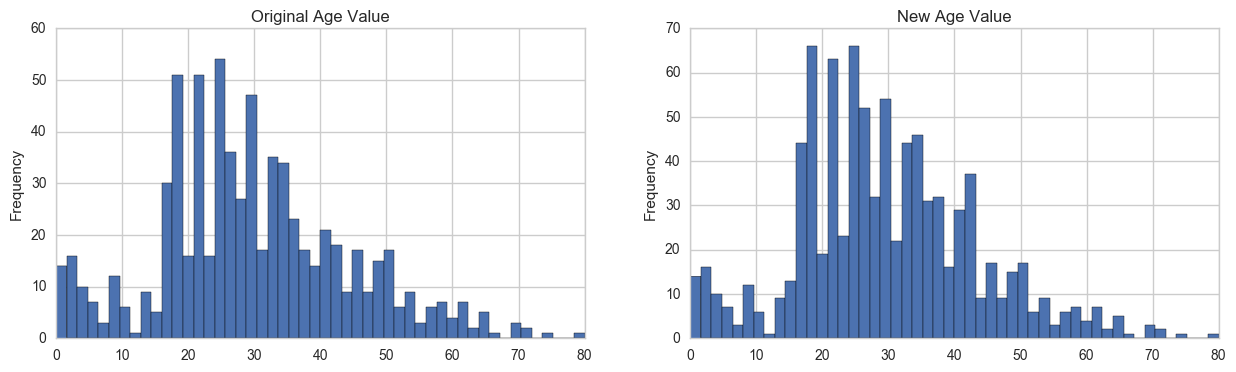

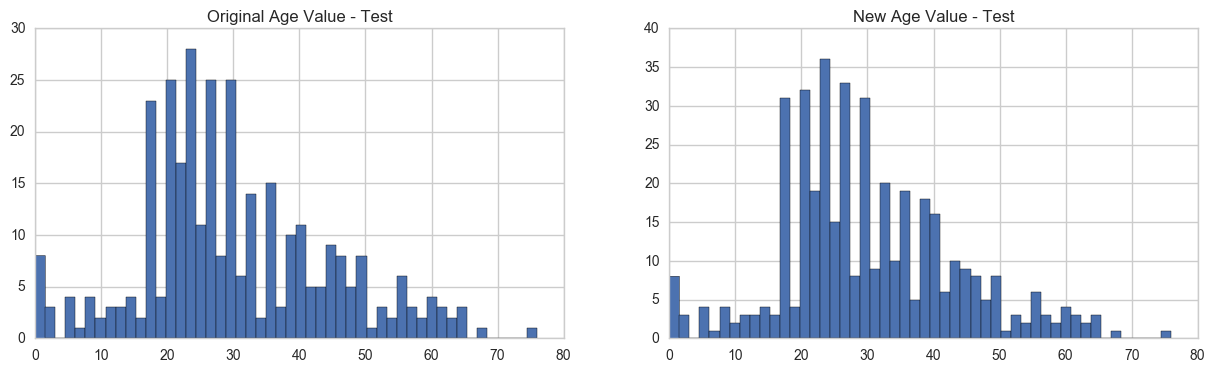

In [27]:
#先切割分配好圖的位置（一個要做原始年齡資料，一個是填補後的）
#titanic_df的圖
fig,(axis1,axis2) = plt.subplots(1, 2 , figsize=(15,4))
axis1.set_title('Original Age Value')
axis2.set_title('New Age Value')
#test_df的圖
fig,(axis3,axis4) = plt.subplots(1, 2, figsize=(15,4))
axis3.set_title('Original Age Value - Test')
axis4.set_title('New Age Value - Test')

# get average, std, and number of NaN values in titanic_df and test_df
# 製作平均年齡，基本差，和Nan數量計算
average_age_titanic = titanic_df['Age'].mean()
std_age_titanic = titanic_df['Age'].std()
count_nan_age_titanic = titanic_df['Age'].isnull().sum()

average_age_test = test_df['Age'].mean()
std_age_test = test_df['Age'].std()
count_nan_age_test = test_df['Age'].isnull().sum()

#generate random numbers between (mean-std)&(mean+std)
#填補數值用平均值跟標準差的差值之間，產生數值的數量就是上面Nan的數量 np.random.randint 隨機整數
rand_1 = np.random.randint(average_age_titanic - std_age_titanic, average_age_titanic + std_age_titanic, 
                           size = count_nan_age_titanic)

rand_2 = np.random.randint(average_age_test - std_age_test, average_age_test + std_age_test, 
                           size = count_nan_age_test)

#plot 'Original Age Value' and 'Origianl Age Value - Test'
#drop all null values and convert to int 畫圖，並且去掉所有null，然後數值轉成整數
titanic_df['Age'].dropna().astype(int).plot(kind='hist', bins=50, ax = axis1) #為啥.hist會出錯，.plot(kind='hist')就沒事..
test_df['Age'].dropna().astype(int).hist(bins=50, ax=axis3)

#fill all NaN values in age columns with random values generated
#用剛剛rand1產生的隨機整數填補NaN
titanic_df['Age'][np.isnan(titanic_df['Age'])] = rand_1
test_df['Age'][np.isnan(test_df['Age'])] = rand_2

#convert from flot to int
#從小數(float)轉成整數(int)
titanic_df['Age'] = titanic_df['Age'].astype(int)
test_df['Age'] = test_df['Age'].astype(int)

#plot 'New Age Value' and 'New Age Value -Test'
#畫圖，畫填補數值過後的圖
titanic_df['Age'].plot(kind='hist', bins=50, ax=axis2)
test_df['Age'].hist(bins=50, ax=axis4)

plt.show()

* 大約在新數值的圖表中，30~40區間的值數量變多。

//anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


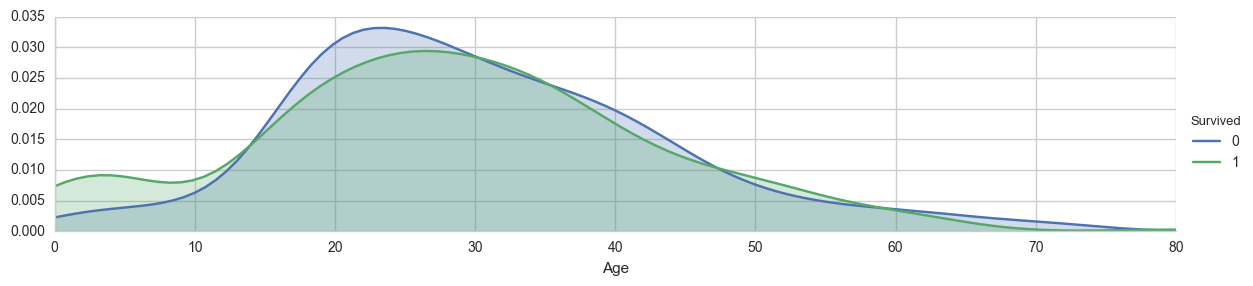

In [37]:
# peaks for survived/not survived passengers by their age
#畫圖，曲線面圖，將存活和沒存活的分開，各自年齡人數的佔比
#sns.FacetGrid，sns.kdeplot  沒學過
facet = sns.FacetGrid(titanic_df, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, titanic_df['Age'].max()))
facet.add_legend()

plt.show()

* 藍色曲面圖（曲面面積是所有死亡人數）可以看出約在年齡22是死亡占比最高
* 綠色曲面圖（曲面面積是所有存活人數）可以看出約在年齡26是存活占比最高
* 可見titanic的乘客，其實青壯年中（20~40歲）是佔存活人中最多比重，但也是死亡人數中佔比最高的。

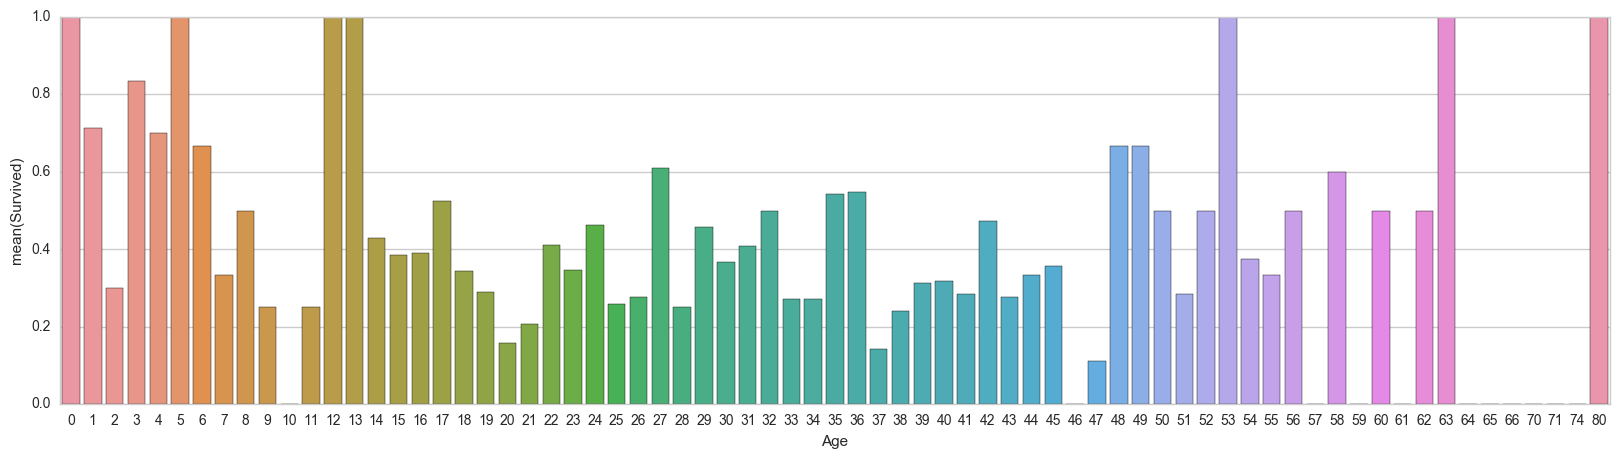

In [47]:
#average survived passengers by age
#平均存活率by年齡分佈
plt.figure(figsize=(20,5))
age_perc = titanic_df[['Age','Survived']].groupby(['Age'], as_index=False).mean()
sns.barplot(x='Age', y='Survived', data=age_perc)

plt.show()

* 可以看出最年輕，和最老的生存機率最高。（應該是因為：老＆儒先疏散）

## Cabin 艙別分析

In [48]:
#It has a lot of Nan values, so it won't cause a remarkable impact on perdiction
#數據中titanic_df：204 non-null object/全部891 ，   test_df：91 non-null object/全部418  太多Nan了，所以不分析
titanic_df.drop('Cabin', axis=1, inplace=True)
test_df.drop('Cabin', axis=1, inplace=True)

## Family 家庭分析

In [ ]:
#Instead of 